Program to check if th given text is Spam or not
Author : Varsha Waingankar

In [1]:
import pandas as pd
#Importing the packages
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("/Users/varsha/Downloads/spam.csv", encoding ='latin1')
df.head(5)

df.columns

df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

df = df.rename(index=str, columns={"v1": "Label", "v2": "Text"})

df_new = pd.Series(np.where(df.Label.values == 'spam', 1, 0),
          df.index)
d = {'Text': df['Text'], 'Label': df_new}
df_final = pd.DataFrame(data=d)


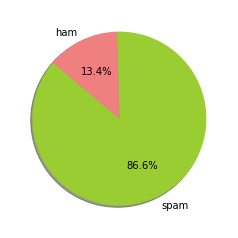

In [3]:

X_train, X_test, y_train, y_test = train_test_split(df_final['Text'], df_final['Label'],test_size=0.25, random_state=42)

classy = df[['Text','Label']]
plt.figure(2)
label = 'spam', 'ham' 
colors = [ 'yellowgreen', 'lightcoral']
plt.pie(classy.groupby('Label').size(),labels=label, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
#plt.axis('equal')

plt.show()

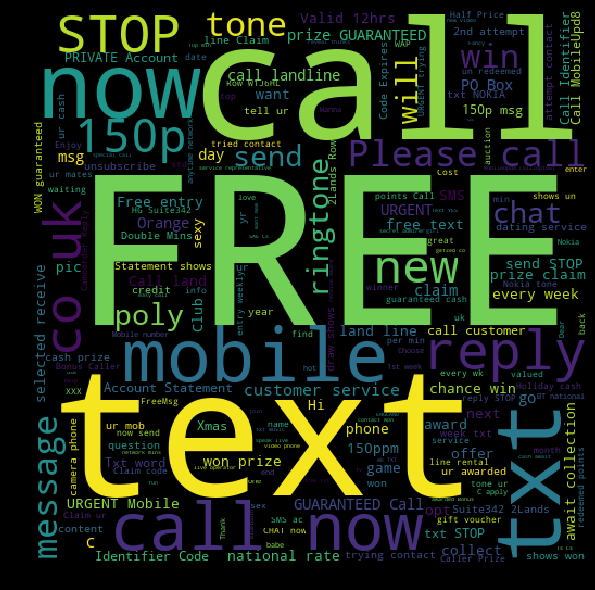

In [4]:

spam_words = ' '.join(list(df_final[df_final['Label'] == 1]['Text']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()



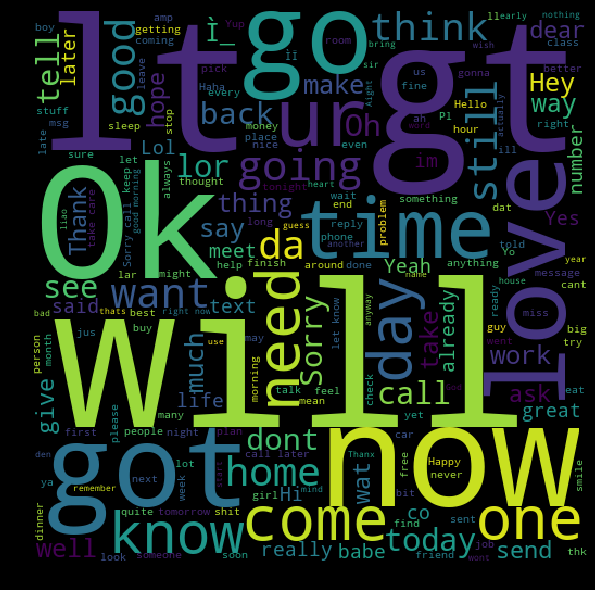

In [5]:


spam_words = ' '.join(list(df_final[df_final['Label'] == 0]['Text']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [6]:

df_final = df_final.dropna()
print(df_final.head(20))
Score = df_final['Label']


                                                 Text  Label
0   Go until jurong point, crazy.. Available only ...      0
1                       Ok lar... Joking wif u oni...      0
2   Free entry in 2 a wkly comp to win FA Cup fina...      1
3   U dun say so early hor... U c already then say...      0
4   Nah I don't think he goes to usf, he lives aro...      0
5   FreeMsg Hey there darling it's been 3 week's n...      1
6   Even my brother is not like to speak with me. ...      0
7   As per your request 'Melle Melle (Oru Minnamin...      0
8   WINNER!! As a valued network customer you have...      1
9   Had your mobile 11 months or more? U R entitle...      1
10  I'm gonna be home soon and i don't want to tal...      0
11  SIX chances to win CASH! From 100 to 20,000 po...      1
12  URGENT! You have won a 1 week FREE membership ...      1
13  I've been searching for the right words to tha...      0
14                I HAVE A DATE ON SUNDAY WITH WILL!!      0
15  XXXMobileMovieClub: 

In [7]:

#Creating an instance of the PortStemmer class
# Stemmer the instance created
#Stem is the function used
#Tokenization performed before stemming
stemmer = PorterStemmer()
from nltk.corpus import stopwords

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    stems = stem_tokens(tokens, stemmer)
    return ' '.join(stems)

intab = string.punctuation
outtab = "                                "
trantab = str.maketrans(intab, outtab)


In [8]:

#--- Training set
#For every text in the X_train , read using loop
#Convert text to lower
#Translate text, replace all punctuation with space
#Create and instance of CountVectorizer class
#Use the CountVectorization to generate Vocabulary and vector, with the fit and transform function
#Use the tfidf transformer to generate the term frequency and inverse document frequency

corpus = []
for text in X_train:
   text = text.lower()
   text = text.translate(trantab)
   text=tokenize(text)
   corpus.append(text)
        
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)        
        
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [9]:

#--- Test set
#Repeat similar procedure as in train data

test_set = []
for text in X_test:
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    test_set.append(text)

X_new_counts = count_vect.transform(test_set)
X_test_tfidf = tfidf_transformer.transform(X_new_counts)


df_final = pd.DataFrame({'Before': X_train, 'After': corpus})
print(df_final.head(5))

prediction = dict()


                                                 Before  \
4281                                  U can call now...   
585   Tell them u have a headache and just want to u...   
4545  Never try alone to take the weight of a tear t...   
3034  Raji..pls do me a favour. Pls convey my Birthd...   
2758            What time. IÛ÷m out until prob 3 or so   

                                                  After  
4281                                     u can call now  
585   tell them u have a headach and just want to us...  
4545  never tri alon to take the weight of a tear th...  
3034  raji pl do me a favour pl convey my birthday w...  
2758             what time iû÷m out until prob 3 or so  


In [10]:

#Applying the Multinomial Naive Bayes model

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)
print("accuaracy of model")
accuracy_score(y_test, prediction['Multinomial'])



accuaracy of model


0.9605168700646087

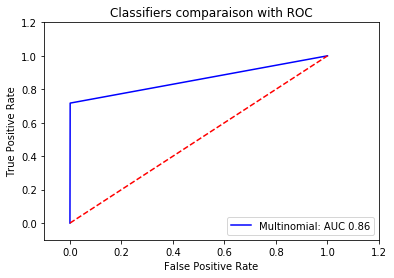

In [11]:
#Plotting the ROC - Area Under the Curve for all the models

def formatt(x):
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


              precision    recall  f1-score   support

        spam       0.96      1.00      0.98      1202
         ham       0.99      0.72      0.83       191

   micro avg       0.96      0.96      0.96      1393
   macro avg       0.97      0.86      0.91      1393
weighted avg       0.96      0.96      0.96      1393



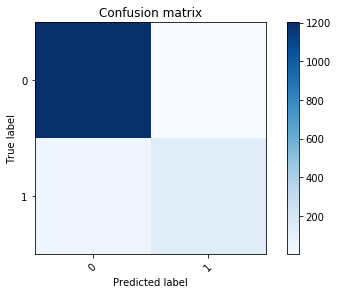

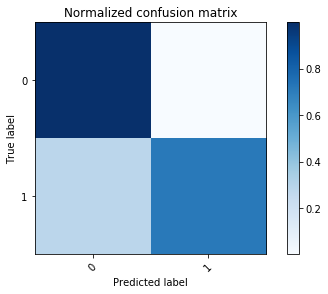

In [12]:

#Confusion Matrix for Logistic Regression Model

print(metrics.classification_report(y_test, prediction['Multinomial'], target_names = ["spam", "ham"]))



def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, prediction['Multinomial'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
